In [6]:
from sklearn import datasets

In [13]:
da=datasets.load_boston()
print(type(da))
x=da.data
y=da.target
x.shape

<class 'sklearn.utils.Bunch'>


(506, 13)

In [21]:
import pandas as pd
df=pd.DataFrame(x)
print(da.feature_names)
df.columns=da.feature_names
df["dis^2"]=df.DIS**2
x2=df.values
df.describe()
x2.shape

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506, 14)

In [19]:
#trainig algo
from sklearn import model_selection
model_selection.train_test_split(x,y)
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,random_state=0)
x2_train,x2_test,y2_train,y2_test=model_selection.train_test_split(x2,y,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x2_train.shape)
print(x2_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)
(379, 14)
(127, 14)


In [24]:
from sklearn.linear_model import LinearRegression
alg=LinearRegression()
alg1=LinearRegression()
alg.fit(x_train,y_train)
alg1.fit(x2_train,y2_train)
y_pred=alg.predict(x_test)

train score: 0.7697699488741149
test score: 0.6354638433202144
train2 score: 0.7784818359849055
test2 score: 0.6644389499997563


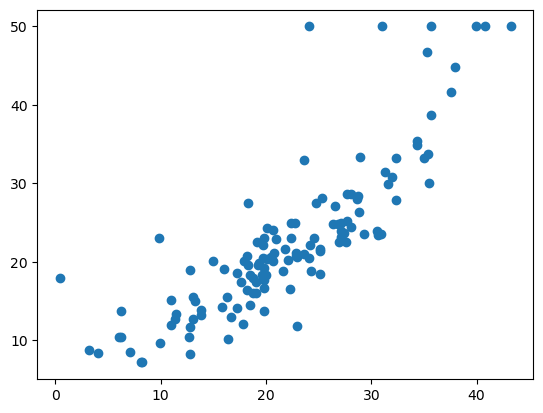

In [35]:
import matplotlib.pyplot as plt
y_pred=alg.predict(x_test)
plt.scatter(y_pred,y_test)
plt.show()

In [3]:
import numpy as np
data = np.loadtxt("https://files.codingninjas.in/data-6984.csv", delimiter = ",")
data.shape


(100, 2)

In [4]:
x=data[:,0].reshape(-1,1)
y=data[:,1]
x.shape

(100,)

In [84]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y)

In [85]:
from sklearn.linear_model import LinearRegression
alg1=LinearRegression()
alg1.fit(x_train,y_train)

LinearRegression()

In [86]:
alg1.coef_

array([1.29189254])

In [87]:
alg1.intercept_


9.061664935053074

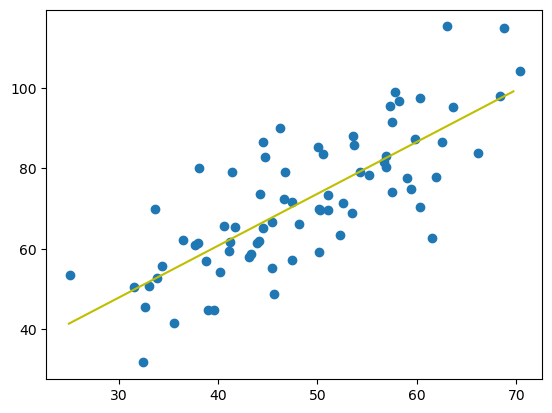

In [94]:
import matplotlib.pyplot as plt
m=alg1.coef_
c=alg1.intercept_
x_line=np.arange(25,70,0.3)
y_line=m*x_line+c
plt.plot(x_line,y_line,"y")
plt.scatter(x_train,y_train)
plt.show()

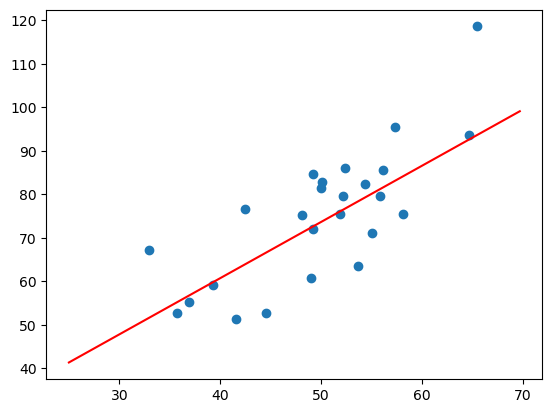

In [92]:
import matplotlib.pyplot as plt
m=alg1.coef_
c=alg1.intercept_
x_line=np.arange(25,70,0.3)
y_line=m*x_line+c
plt.plot(x_line,y_line,"r")
plt.scatter(x_test,y_test)
plt.show()

In [114]:
import numpy as np
data = np.loadtxt("https://files.codingninjas.in/data-6984.csv", delimiter = ",")
x=data[:,0]
y=data[:,1]
x.shape

(100,)

In [112]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3)
x_train.shape

(70,)

In [115]:
def fit(x_train,y_train):
    n=(x_train*y_train).mean()-x_train.mean()*y_train.mean()
    d=(x_train**2).mean()-x_train.mean()**2
    m=n/d
    c=y_train.mean()-m*x_train.mean()
    return m,c

In [119]:
def predict(x,m,c):
    return m*x+c

In [120]:
def score(y_truth,y_pred):
    u=((y_truth-y_pred)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-u/v

In [122]:
def cost(x,y,m,c):
    return ((y-m*x-c)**2).mean()

In [123]:
m,c=fit(x_train,y_train)
#test data
y_test_pred=predict(x_test,m,c)
print("test score:",score(y_test,y_test_pred))

#train data
y_train_pred=predict(x_train,m,c)
print("train score:",score(y_train,y_train_pred))
print("M,C:",m,c)
print("cost on trainig data:",cost(x_train,y_train,m,c))

test score: 0.5198835688191601
train score: 0.6214107009628138
M,C: 1.3198504351172038 8.055601105618763
cost on trainig data: 107.40079094403477


In [ ]:
#adding features

In [ ]:
train_score=alg.score(x_train,y_train)
test_score=alg.score(x_test,y_test)
print("train score:",train_score)
print("test score:",test_score)

train_score=alg1.score(x2_train,y2_train)
test_score=alg1.score(x2_test,y2_test)
print("train2 score:",train_score)
print("test2 score:",test_score)

In [ ]:
 #gradient descent

In [27]:
import numpy as np
data = np.loadtxt("https://files.codingninjas.in/data-6984.csv", delimiter = ",")
data.shape


(100, 2)

In [36]:
def step(data,alpha,m,c):
    m_slope=0
    c_slope=0
    N=len(data)
    for i in range(N):
        x=data[i,0]
        y=data[i,1]
        m_slope += (-2/N)*(y-m*x-c)*x
        c_slope += (-2/N)*(y-m*x-c)
    new_m=m-alpha*m_slope
    new_c=m-alpha*c_slope
    return new_m,new_c
    

In [37]:
def gradient(data,alpha,iteration):
    m=0
    c=0
    for i in range(iteration):
        m,c=step(data,alpha,m,c)
        print(i,"cost:",cost(data,m,c))
    return m,c
    

In [41]:
def cost(data,m,c):
    total=0
    N=len(data)
    for i in range(N):
        x=data[i,0]
        y=data[i,1]
        total+=(1/N)*((y-m*x-c)**2)
        return total

In [46]:
def run():
    data=np.loadtxt("https://files.codingninjas.in/data-6984.csv", delimiter = ",")
    alpha=0.0001
    iteration=100
    m,c=gradient(data,alpha,iteration)
    print(m,c)

In [47]:
run()

0 cost: 0.5984485345718256
1 cost: 0.25108511528992616
2 cost: 1.2487421165337997
3 cost: 2.0005978054706444
4 cost: 2.425696076167101
5 cost: 2.6450633449190057
6 cost: 2.754117949733128
7 cost: 2.8074343020407713
8 cost: 2.833298512988808
9 cost: 2.8457992962368097
10 cost: 2.8518305843221006
11 cost: 2.8547380575795445
12 cost: 2.8561390791714896
13 cost: 2.8568140561436213
14 cost: 2.857139212442559
15 cost: 2.857295842707831
16 cost: 2.8573712910506925
17 cost: 2.8574076339153236
18 cost: 2.8574251398944286
19 cost: 2.8574335723215114
20 cost: 2.857437634119056
21 cost: 2.85743959063641
22 cost: 2.857440533066224
23 cost: 2.8574409870227595
24 cost: 2.857441205687873
25 cost: 2.857441311016088
26 cost: 2.857441361751352
27 cost: 2.857441386189884
28 cost: 2.857441397961616
29 cost: 2.8574414036319093
30 cost: 2.857441406363218
31 cost: 2.8574414076788544
32 cost: 2.8574414083125808
33 cost: 2.8574414086178375
34 cost: 2.8574414087648785
35 cost: 2.8574414088357027
36 cost: 2.85744